In [14]:
%run Common.ipynb

In [15]:
import os.path
import pandas as pd

#!pip install surprise
from surprise import Dataset, Reader
from surprise.prediction_algorithms.matrix_factorization import NMF
from surprise.model_selection.validation import cross_validate

#new function added for Q15
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import label_binarize
from surprise.model_selection import train_test_split #train, test data split

#np.set_printoptions(suppress=True,floatmode='maxprec_equal')

In [16]:
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file('ml-latest-small/ratings.csv', reader=reader)

In [17]:
trainset, testset = train_test_split(data, test_size=.1)

In [18]:
#from Q17 & 18, use k for minimum RMSE
k = 20
nmf = NMF(n_factors=k)
_ = nmf.fit(trainset)
predictions = nmf.test(testset)

<h3>Threshold: 2.5</h3>

In [19]:
threshold = 2.5
binarizer = Binarizer(threshold=threshold)

In [20]:
test_preds = np.array([i.est for i in predictions])
test_preds

array([ 3.76907094,  3.39561726,  4.68238853, ...,  3.230223  ,
        3.50089617,  2.51644894])

In [21]:
test_labels = np.array([i[2] for i in testset]).reshape(1, -1)
test_labels_bin = binarizer.transform(test_labels)
test_labels_bin

array([[ 1.,  1.,  1., ...,  0.,  0.,  1.]])

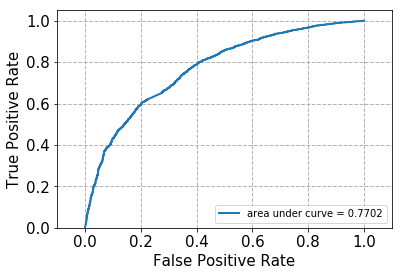

In [22]:
fpr, tpr, _ = roc_curve(test_labels_bin.reshape(-1,1), test_preds.reshape(-1,1))
plot_roc(fpr, tpr)

In [23]:
roc_auc = auc(fpr, tpr)
print("Area under curve: %.4f" %roc_auc)

Area under curve: 0.7702


<h3>Threshold: 3.0</h3>

Area under curve: 0.7448


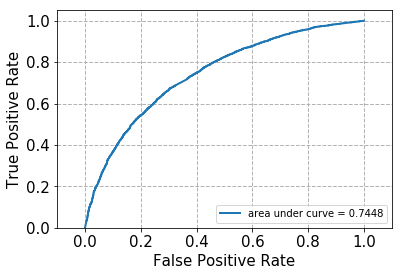

In [24]:
threshold = 3.0
binarizer = Binarizer(threshold=threshold)
test_preds = np.array([i.est for i in predictions])
test_labels = np.array([i[2] for i in testset]).reshape(1, -1)
test_labels_bin = binarizer.transform(test_labels)
fpr, tpr, _ = roc_curve(test_labels_bin.reshape(-1,1), test_preds.reshape(-1,1))
plot_roc(fpr, tpr)
roc_auc = auc(fpr, tpr)
print("Area under curve: %.4f" %roc_auc)

<h3>Threshold: 3.5</h3>

Area under curve: 0.7521


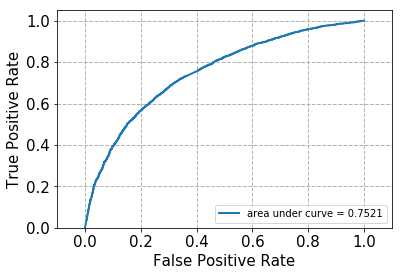

In [25]:
threshold = 3.5
binarizer = Binarizer(threshold=threshold)
test_preds = np.array([i.est for i in predictions])
test_labels = np.array([i[2] for i in testset]).reshape(1, -1)
test_labels_bin = binarizer.transform(test_labels)
fpr, tpr, _ = roc_curve(test_labels_bin.reshape(-1,1), test_preds.reshape(-1,1))
plot_roc(fpr, tpr)
roc_auc = auc(fpr, tpr)
print("Area under curve: %.4f" %roc_auc)

<h3>Threshold: 4.0</h3>

Area under curve: 0.7540


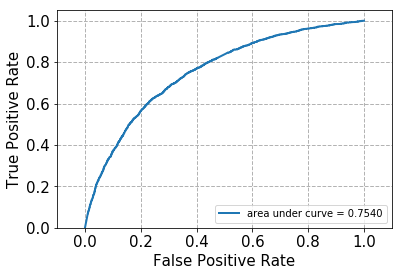

In [26]:
threshold = 4.0
binarizer = Binarizer(threshold=threshold)
test_preds = np.array([i.est for i in predictions])
test_labels = np.array([i[2] for i in testset]).reshape(1, -1)
test_labels_bin = binarizer.transform(test_labels)
fpr, tpr, _ = roc_curve(test_labels_bin.reshape(-1,1), test_preds.reshape(-1,1))
plot_roc(fpr, tpr)
roc_auc = auc(fpr, tpr)
print("Area under curve: %.4f" %roc_auc)